In [54]:
# pip install --upgrade tensorflow-probability

In [55]:
#  pip install tfp-nightly

In [56]:
pip install pyAstronomy

In [57]:
pip install arviz


In [58]:
import numpy as np
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.compat.v2 as tf
import tensorflow_probability as tfp
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files
import io
from PyAstronomy import pyasl
import time
r = pyasl.BallesterosBV_T()
b = pyasl.Ramirez2005()

uploaded = files.upload()

data0 = data = np.array(pd.read_csv(io.BytesIO(uploaded['SItable1.csv'])))

Saving SItable1.csv to SItable1 (1).csv


In [59]:
import tensorflow.math as tf_m
def mean_fn(x, y, a, b, c, d, e):
  return 1e-3 * np.exp(x)**(1/a) *( b*(y - c)**d * np.exp(e*np.array(feh)))**(-1/a)#the m relation was through trial and error
#fn from Barnes 2007
def mean_fn_hmc(x):
  a = 0.5189
  b=0.75
  c=0.4
  d=0.601
  e = 2.718#np.float64(np.exp(1))
  BV = (5601/10**x[:,1])**3/2 - 0.3
  return (e**(x[:,0])*1000)**a * b*(BV - c)**d
  #return tf.convert_to_tensor(p, dtype=np.float64)#((e**x[:,0])*1000)**0.5189 * 0.75*(BV)**0.601

In [60]:
# # mean_fn_hmc(observation_index_points)- p
# BV = (5601/10**observation_index_points[:,1])**3/2 #- 0.3
# ((2.718**observation_index_points[:,0])*1000)**0.5189 * 0.75*(BV)**0.601

In [122]:
te = data0[:,2].tolist()
tee= data0[:,3].tolist()
age = data0[:,4].tolist()
agle = data0[:,5].tolist()
ague = data0[:,6].tolist()
mass = data0[:,7].tolist()
massle = data0[:,8].tolist()
massue = data0[:,9].tolist()
feh  = data0[:,10].tolist()
efeh  = data0[:, 11].tolist()
p = data0[:,21].tolist()
pl = data0[:,22].tolist()
pu = data0[:,23].tolist()

mass_error = (np.array(massle) + np.array(massue))/2
age_error = (np.array(agle)+np.array(ague))/2#np.log(age) - np.log(np.array(age) - np.array(agle))
p_error = ((np.array(pl)+np.array(pu))/2)#(np.log(p) - np.log(np.array(p)-np.array(pl)))


In [124]:
# indctr = data0[:,24]
# index = 0
# for i in range(0, len(p)-index):
#   if age[i]<2 or age[i]>11 or p[i]<5 or indctr[i]>1:
#     index = index+1
# for i in range(0, len(p)-index):
#   if age[i]<2 or age[i]>11 or p[i]<5 or indctr[i]>1:
#     te.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     tee.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     age.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     agle.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     ague.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     mass.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     massle.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     massue.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     p.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     pl.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     pu.pop(int(np.where(np.array(p) == float(p[i]))[0]))
indctr = data0[:,24]
index = 0
for i in range(0, len(p)-index):
  if p[i]<5 or  indctr[i]>1:
    index = index+1
for i in range(0, len(p)-index):
  if p[i]<5 or  indctr[i]>1:
    te.pop(int(np.where(np.array(p) == float(p[i]))[0]))
    tee.pop(int(np.where(np.array(p) == float(p[i]))[0]))
    age.pop(int(np.where(np.array(p) == float(p[i]))[0]))
    agle.pop(int(np.where(np.array(p) == float(p[i]))[0]))
    ague.pop(int(np.where(np.array(p) == float(p[i]))[0]))
    massle.pop(int(np.where(np.array(p) == float(p[i]))[0]))
    massue.pop(int(np.where(np.array(p) == float(p[i]))[0]))
    pl.pop(int(np.where(np.array(p) == float(p[i]))[0]))
    pu.pop(int(np.where(np.array(p) == float(p[i]))[0]))
    mass.pop(int(np.where(np.array(p) == float(p[i]))[0]))
    feh.pop(int(np.where(np.array(p) == float(p[i]))[0]))
    efeh.pop(int(np.where(np.array(p) == float(p[i]))[0]))
    p.pop(int(np.where(np.array(p) == float(p[i]))[0]))


mass_error = (np.array(massle) + np.array(massue))/2
age_error = (np.array(agle)+np.array(ague))/2#np.log(age) - np.log(np.array(age) - np.array(agle))
p_error = ((np.array(pl)+np.array(pu))/2)#/np.array(p)#(np.log(p) - np.log(np.array(p)-np.array(pl)))

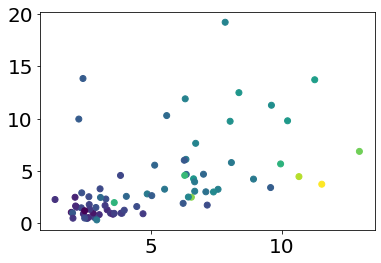

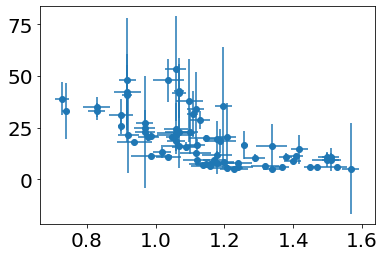

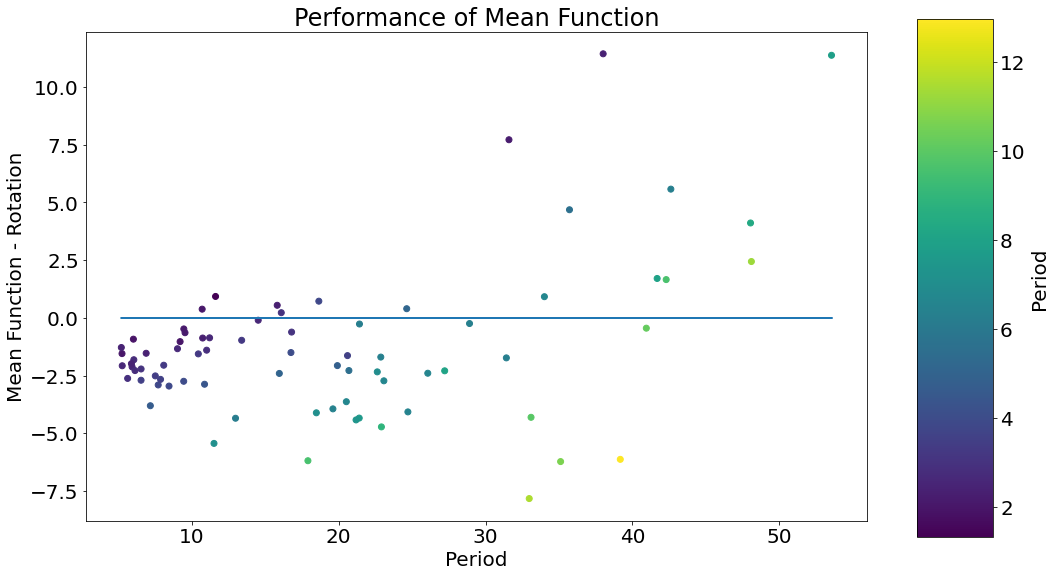

In [125]:
data = np.array([te, p, age, mass]).T
a = 0.5189
b=0.75
c=0.4
d=0.601
e = 0.116
X1 = np.log(data[:,1]) #age
X2 = r.t2bv(data[:,0])#data[::al,2] #B_V
X3 = data[:, 3] #mass
x = mean_fn(X1, X2, a, b, c, d, e)
plt.scatter(data[:,2], x, c=X2, cmap='viridis')
plt.show()
plt.errorbar(X3, p, xerr=mass_error, yerr=p_error, fmt='o')#, c=X2, cmap='hsv')
subtract = x-data[:,2]
plt.show()
fig = plt.figure(figsize=(14, 9))
plt.scatter(p, subtract, c=age, cmap='viridis')#data[:,2]
zero = np.zeros(len(x))
plt.plot(p, zero)
#plt.legend(fontsize='medium', loc=3)
plt.title('Performance of Mean Function')
plt.xlabel('Period')
plt.ylabel('Mean Function - Rotation')
#plt.subplots_adjust(bottom=np.min(X2), top=np.max(X2))
cax = plt.axes([0.95, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax, label='Period')
# plt.savefig("mean_fn.pdf", bbox_inches = 'tight')
# files.download("mean_fn.pdf") 

In [66]:
np.sum(abs(subtract))/len(p)

2.526767165879473

In [71]:
import scipy
scipy.stats.ttest_ind(x, np.sort(age))

Ttest_indResult(statistic=-2.1145062265496857, pvalue=0.03632405358092215)

In [68]:
p_barnes = np.exp(-0.5*(np.sort(age)-np.sort(x))**2)/np.sqrt(2*np.pi)
p_barnes_odds = 1
for i in p_barnes[:40]:
  p_barnes_odds = p_barnes_odds*i

In [69]:
p_barnes_odds

5.079338365792857e-36

In [70]:
p_barnes

array([2.35523316e-01, 1.17233673e-01, 1.20235583e-01, 1.18860698e-01,
       1.17170370e-01, 1.69495401e-01, 1.76025644e-01, 1.61057354e-01,
       1.48812770e-01, 1.50703590e-01, 1.47606836e-01, 1.46001676e-01,
       1.40410535e-01, 1.31125150e-01, 1.29941652e-01, 1.21740414e-01,
       1.44058067e-01, 1.51174120e-01, 1.57080727e-01, 1.60407954e-01,
       1.65862286e-01, 1.49580345e-01, 1.54271851e-01, 1.51424291e-01,
       1.34920072e-01, 1.35317134e-01, 1.42449409e-01, 1.28998439e-01,
       1.41843808e-01, 1.94096472e-01, 1.73153930e-01, 1.53162374e-01,
       1.53030517e-01, 1.46061042e-01, 1.32108296e-01, 1.22211617e-01,
       6.52897426e-02, 4.65916962e-02, 4.69543698e-02, 4.04464775e-02,
       3.79945141e-02, 1.61399636e-02, 1.51235815e-02, 4.38970283e-03,
       3.55069261e-03, 3.48384156e-03, 3.95841287e-03, 1.51634722e-02,
       2.56045914e-02, 2.24454168e-02, 3.32858554e-02, 3.40732778e-02,
       3.88730510e-02, 2.76979645e-02, 1.98425941e-02, 9.44855889e-02,
      

In [72]:
above = 0
below = 0
total = 0
for i in range(0, len(subtract)):
  if subtract[i]>=0 and p[i]>30:
    above = above + 1
  if subtract[i]<0 and p[i]>30:
    below = below + 1
  if p[i]>30:
    total = total+1

print('Above', 100*(above/total))
print('Below', 100*(below/total))

Above 75.0
Below 25.0


In [126]:
tf.enable_v2_behavior()
t1 = time.perf_counter()

tfb = tfp.bijectors
tfd = tfp.distributions
psd_kernels = tfp.math.psd_kernels

# observations from a known function at some random points.
X1 = np.log(p) #age
X2 = np.log10(te)#data[::al,2] #B_V
X3 = np.array(feh)+1##np.array(mass)
observation_index_points = np.dstack([X1, X2]).reshape(-1, 2)
#observation_index_error =np.dstack([np.array(age_error/age), efeh]).reshape(-1, 2)
observation_index_error =np.dstack([np.array(p_error/p), 0.43*np.array(tee)/np.array(te)]).reshape(-1, 2)
shape = np.array(observation_index_points.shape)
resolution = len(X2)
X1_test = np.log(np.linspace( np.min(data[::,2]), np.max(data[::,2]), num=resolution ))
X2_test = np.linspace( np.min(X2), np.max(X2), num=resolution )
X3_test = np.linspace( np.min(X3), np.max(X3), num=resolution )
X_test = np.dstack([X1_test, X2_test]).reshape(resolution,2)# resolution, resolution, 3)

a = 0.5189
b=0.75
c=0.4
d=0.601

Y = observations = (np.array(age) - mean_fn(X1, r.t2bv(np.array(te)), a, b, c, d, e))
noise_variance = age_error**0.5

sigma_init = 0.05*(max(Y) - min(Y))**0.5
l_scale = 4*(max(X2) - min(X2))
gaussian_process_model = tfd.JointDistributionSequential([
  tfd.LogNormal(sigma_init*np.ones(shape), np.float64(.00001)),
  tfd.LogNormal(l_scale*np.ones(shape), np.float64(.00001)),
  tfd.LogNormal(observation_index_points, observation_index_error),
  #tfd.Normal(X2.reshape(-1), 0.04*X1.reshape(-1)),
  # tfd.Normal(X3.reshape(-1), 0.04*X1.reshape(-1)),
  lambda amplitude, length_scale, observations1_: tfd.GaussianProcess(
      kernel=psd_kernels.ExponentiatedQuadratic(amplitude, length_scale),# mean_fn=mean_fn_hmc,
      index_points=observations1_, observation_noise_variance=observation_index_error)])

initial_chain_states = [
    sigma_init * tf.ones(shape, dtype=np.float64, name='init_amplitude'),
    l_scale * tf.ones(shape, dtype=np.float64, name='init_length_scale'),
    tf.convert_to_tensor(observation_index_points, dtype=np.float64, name='observations1_')]
    # tf.convert_to_tensor(X2.reshape(-1), dtype=np.float64, name='observations2_'),
    # tf.convert_to_tensor(X3.reshape(-1), dtype=np.float64, name='observations3_')]

initial_steps = [
    5e-6* tf.ones(shape, dtype=np.float64),
    5e-6* tf.ones(shape, dtype=np.float64),
    5e-3*tf.convert_to_tensor(observation_index_error, dtype=np.float64)]

unconstraining_bijectors = [
    tfp.bijectors.Softplus(),
    tfp.bijectors.Softplus(),
    # tfp.bijectors.Softplus(),
    tfp.bijectors.Softplus()]

def unnormalized_log_posterior(*args):
  return gaussian_process_model.log_prob(*args, x=observations)

# noise_var1 = tfp.util.TransformedVariable(
#   noise_variance, tfb.Exp(), dtype=tf.float64, name='noise_variance')

# #optimizer = tf.optimizers.Adam(learning_rate=5, beta_1=.9, beta_2=.99)
# optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.2, nesterov=False)
# def optimize():
#   with tf.GradientTape() as tape:
#     loss = -gp.log_prob(observations)
#   grads = tape.gradient(loss, gp.trainable_variables)
#   optimizer.apply_gradients(zip(grads, gp.trainable_variables))
#   return loss

num_results = 50
num_burnin_steps = 100
@tf.function
# def run_mcmc():
#   return tfp.mcmc.sample_chain(
#       num_results=num_results,
#       num_burnin_steps=num_burnin_steps,
#       num_steps_between_results=3,
#       current_state=initial_chain_states,
#       kernel=tfp.mcmc.SimpleStepSizeAdaptation(
#           inner_kernel = tfp.mcmc.HamiltonianMonteCarlo( 
#               target_log_prob_fn=unnormalized_log_posterior,
#               step_size=initial_steps,
#               num_leapfrog_steps=4), 
#               num_adaptation_steps=int(num_burnin_steps)),
#       trace_fn=lambda _, pkr: pkr.inner_results.is_accepted)

def run_mcmc():
  return tfp.mcmc.sample_chain(
      num_results=num_results,
      num_burnin_steps=num_burnin_steps,
      num_steps_between_results=3,
      current_state=initial_chain_states,
      kernel = tfp.mcmc.NoUTurnSampler( 
              target_log_prob_fn=unnormalized_log_posterior,
              step_size=initial_steps,
              unrolled_leapfrog_steps=4, parallel_iterations=2))
#   kernel=tfp.mcmc.SimpleStepSizeAdaptation(
# def run_mcmc():
#   return tfp.mcmc.sample_chain(
#       num_results=num_results,
#       num_burnin_steps=num_burnin_steps,
#       num_steps_between_results=3,
#       current_state=initial_chain_states,
#       kernel = tfp.mcmc.SimpleStepSizeAdaptation(
#           inner_kernel = tfp.mcmc.NoUTurnSampler( 
#           target_log_prob_fn=unnormalized_log_posterior,
#           step_size=initial_steps,
#           unrolled_leapfrog_steps=4, parallel_iterations=1),
#           num_adaptation_steps=int(num_burnin_steps)),
#         trace_fn=lambda _, pkr: pkr.inner_results.is_accepted)

[
      amplitudes,
      length_scales,
      observations1_#, observations2_,observations3_
], is_accepted = run_mcmc()


#print("Acceptance rate: {}".format(np.mean(is_accepted)))
#observation_index_points = np.dstack([observations1_.numpy()[0], observations2_.numpy()[0], observations3_.numpy()[0]]).reshape(-1,3)
observation_index_points_1 = np.mean(observations1_,axis=0)#np.dstack([observations1_.numpy()[0], observations2_.numpy()[0], observations3_.numpy()[0]]).reshape(-1,3)
observations_l = np.array(age) - mean_fn(observation_index_points_1[:,0], r.t2bv(10**observation_index_points_1[:,1]), a, b, c, d, e)
#Y = observations = np.array(p) - mean_fn(observation_index_points[:,0], r.t2bv(10**(observation_index_points[:,1])), a, b, c, d)

gp = tfd.GaussianProcessRegressionModel(
    kernel=psd_kernels.ExponentiatedQuadratic(np.mean(amplitudes), np.mean(length_scales)),
    index_points=X_test,
    observation_index_points=observation_index_points_1,
    observations= observations_l,
    observation_noise_variance=noise_variance, predictive_noise_variance = noise_variance)

# for i in range(100):
#   neg_log_likelihood_ = optimize()
#   if i % 100 == 0:
#     print('.')

# print("Final NLL = {}".format(neg_log_likelihood_))

samples = gp.sample(10).numpy()
var = np.array(gp.variance())
# ==> 10 independently drawn, joint samples at `index_points`.
# ==> 10 independently drawn, noisy joint samples at `index_points`
t2 = time.perf_counter()
print()


/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/mcmc/sample.py:341: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


Text(0.5, 0, '')

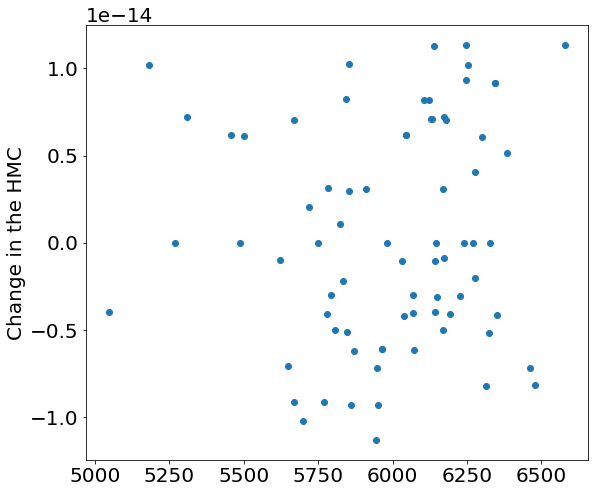

In [127]:
plt.figure(figsize=(9,8))
plt.scatter(10**observation_index_points[:,1], (10**observation_index_points[:,1] - 10**observation_index_points_1[:,1])/(10**observation_index_points[:,1]))
plt.ylabel('Change in the HMC')
plt.xlabel('')

In [ ]:
np.std(observations1_[:,:,1], axis=0)

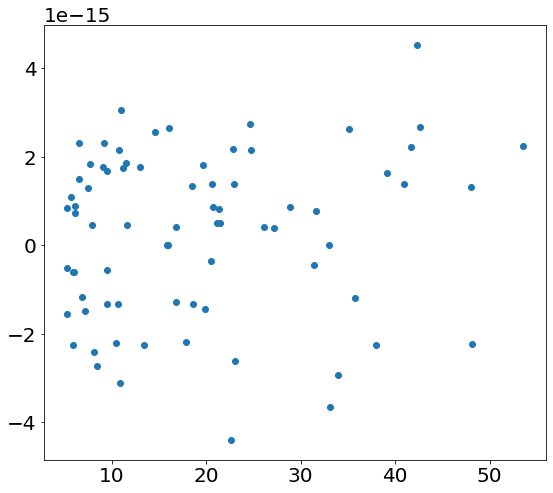

In [128]:
plt.figure(figsize=(9,8))
e_p = np.float64(np.exp(1))
plt.scatter(e_p**observation_index_points[:,0], (e_p**observation_index_points[:,0] - e_p**observation_index_points_1[:,0])/(e_p**observation_index_points[:,0]))

In [129]:

noise_var1 = tfp.util.TransformedVariable(
  0.001*noise_variance, tfb.Exp(), dtype=tf.float64, name='noise_variance')

optimizer = tf.optimizers.Adam(learning_rate=.018, beta_1=.9, beta_2=.99)
#optimizer = tf.keras.optimizers.SGD(learning_rate=1., momentum=0.0, nesterov=False)
def optimize():
  with tf.GradientTape() as tape:
    loss = -gp.log_prob(observations)
  grads = tape.gradient(loss, gp.trainable_variables)
  optimizer.apply_gradients(zip(grads, gp.trainable_variables))
  return loss

gp = tfd.GaussianProcessRegressionModel(
    kernel=psd_kernels.ExponentiatedQuadratic(np.mean(amplitudes), np.mean(length_scales)),
    index_points=X_test,
    observation_index_points=observation_index_points_1,
    observations= observations,
    observation_noise_variance=noise_variance, predictive_noise_variance = noise_var1)

for i in range(1000):
  neg_log_likelihood_ = optimize()
  if i % 100 == 0:
    print('.')
print("Final NLL = {}".format(neg_log_likelihood_))
samples = gp.sample(10).numpy()
var = np.array(gp.variance())

.
.
.
.
.
.
.
.
.
.
Final NLL = [ 994.93497131  777.1985784  1287.52477652 1725.27687769  856.26295299
 1486.31882112  562.06567708  703.87858174  844.05346167  594.70679668
  768.47291925  821.35075599  551.82864126  672.96386366  632.5697961
 1268.35837707  896.95486748  652.07698455  637.67859444  518.70835332
  928.14061063  941.61796403  696.90369393 1518.96003975  812.97968457
  670.57572087 1591.84189694  875.79089181 1104.4958474   536.8636102
  557.87742128  583.80142385  719.1682549   742.20175748  708.9125431
 1518.96003975  762.15276441  774.9840826   754.6075391   722.12089811
  539.55109559 1262.63750424  982.82296444  928.0992642   889.70456063
  637.67859444  730.48192164  736.24861313 1778.64540727 1518.96003975
 1509.33959917  532.51734596  751.42644313  808.84093971 1903.35272644
  821.35075599  600.72212605  838.17185985  676.1482673  1229.36608683
 1049.87578026  546.97228871  727.77327243 1112.5587084   853.15285716
  457.87279792  844.05346167  788.61905422  774.

In [ ]:
(noise_var1 - noise_variance)/noise_variance

In [130]:
samples = gp.sample(10).numpy()
var = np.array(gp.variance())

In [ ]:
var1 = np.array([
      amplitudes[0],
      length_scales[0], observations1_[0]])
az.plot_autocorr(var1)
'''
, var_names=("amplitudes",
      "length_scales",
      "observation_noise_variances"))'''

In [119]:

p = data0[:,21]
te = data0[:,2][p>5].tolist()
tee= data0[:,3][p>5].tolist()
age = data0[:,4][p>5].tolist()
agle = data0[:,5][p>5].tolist()
ague = data0[:,6][p>5].tolist()
mass = data0[:,7][p>5].tolist()
massle = data0[:,8][p>5].tolist()
massue = data0[:,9][p>5].tolist()
pl = data0[:,22][p>5].tolist()
pu = data0[:,23][p>5].tolist()
p_0 = data0[:,21][p>5].tolist()
p = data0[:,21][p>5].tolist()

# mass_error = (np.array(massle) + np.array(massue))/2
# age_error = (np.array(agle)+np.array(ague))/2#np.log(age) - np.log(np.array(age) - np.array(agle))
# p_error = ((np.array(pl)+np.array(pu))/2)#/np.array(p)#(np.log(p) - np.log(np.array(p)-np.array(pl)))

In [131]:
numElems = len(Y)
sample = samples[0] + mean_fn(observation_index_points_1[:,0], r.t2bv(10**(observation_index_points_1[:,1])), a ,b ,c ,d, e)#np.array(observation_index_points[:,1])
idx = np.round(np.linspace(0, len(np.array(sample).reshape(numElems**2)) - 1, numElems)).astype(int)
# Picks equal spaced elements from (longer) prediction array so that its shape of data

mu_test = (np.array(sample).reshape(numElems**2)[idx])
sd_test = (np.array(var).reshape(numElems**2)[idx]) 

vals = np.sort([mu_test, sd_test], axis=1)
# numElems = len(Y)
# sample = samples[0] + mean_fn(observation_index_points[:,0], r.t2bv(10**(np.array(observation_index_points[:,1]))), a ,b ,c ,d)
# idx = np.round(np.linspace(0, len(np.array(sample).reshape(numElems)) - 1, numElems)).astype(int)
# # Picks equal spaced elements from (longer) prediction array so that its shape of data

# mu_test = (np.array(sample).reshape(numElems)[idx])
# sd_test = (np.array(var).reshape(numElems)[idx]) 

# vals = np.sort([mu_test, sd_test], axis=1)


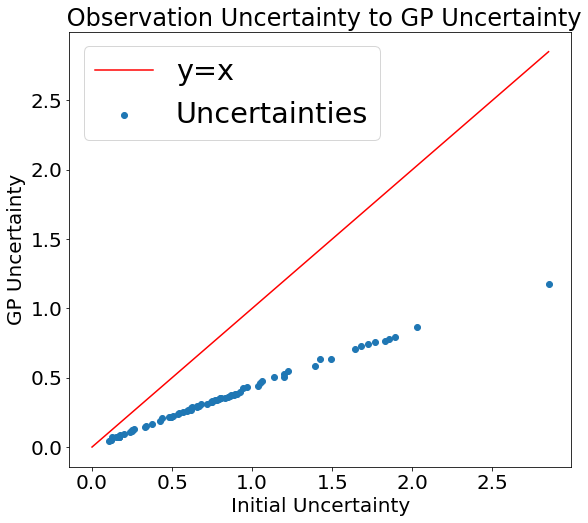

In [132]:
plt.figure(figsize=(9,8))
plt.rcParams['font.size'] = '20'
x = np.linspace(0, max(age_error))
plt.plot(x, x , 'r', label = 'y=x')
plt.scatter(np.sort(age_error), vals[1]**2, label='Uncertainties')
plt.xlabel('Initial Uncertainty')
plt.ylabel('GP Uncertainty')
plt.title(' Observation Uncertainty to GP Uncertainty')
plt.legend(fontsize='x-large')
#plt.ylim(0,10)
# plt.savefig("error_adam.pdf")
# files.download("error_adam.pdf") 

In [ ]:
vals[0]#**2

Text(0, 0.5, 'Frequency')

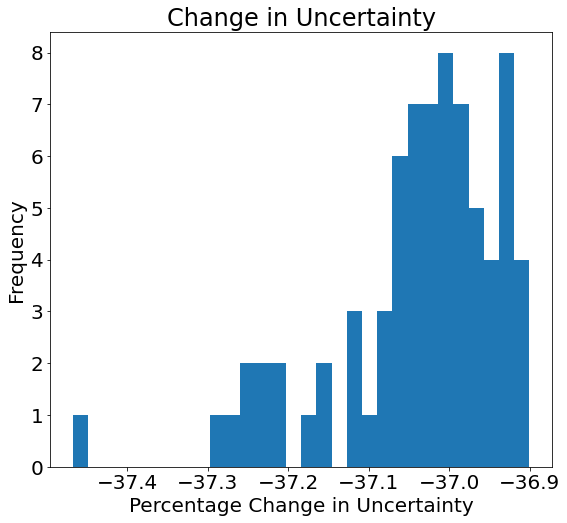

In [133]:
plt.figure(figsize=(9,8))
plt.title('Change in Uncertainty')
per_error = 100*(noise_var1 - noise_variance)/noise_variance#100*(vals[1] - np.sort(age_error**0.5))/age_error
plt.hist(per_error,  bins=30)
#plt.xlim(-25,0)
plt.xlabel('Percentage Change in Uncertainty')
plt.ylabel('Frequency')

In [134]:
sorted_age = np.sort(age)
perstd= 0
for i in range(0,len(p)):
  if abs((sorted_age[i] - vals[0, i]))<3*vals[1,i]:#1*(vals[1,i]**2+(0.9*noise_variance[i])**2)**0.5:
    perstd=perstd+1
print(perstd/len(p))

0.84


In [135]:
ab8 = 0
for i in age:
  if i>8:
    ab8 = ab8 + 1

print(100*ab8/(len(age)+1))

15.789473684210526


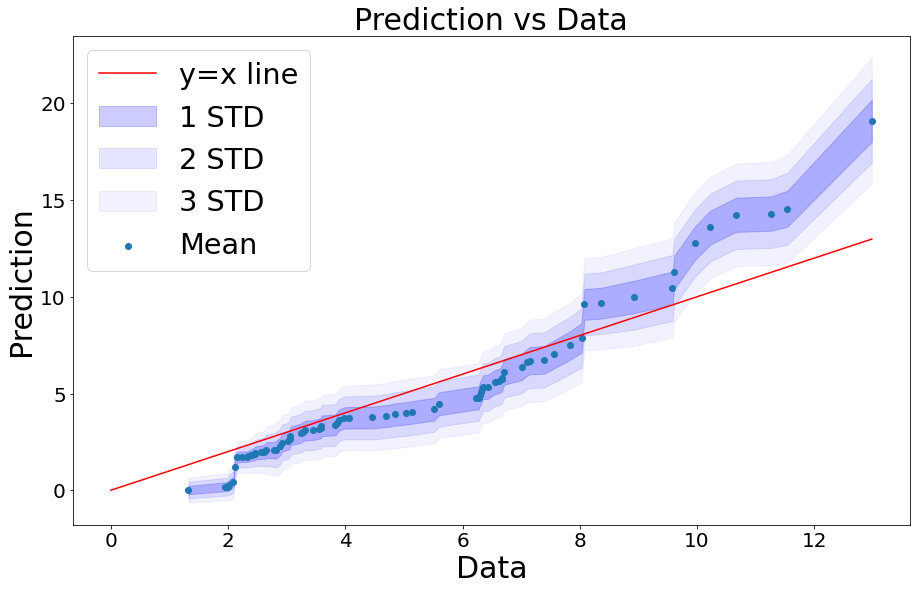

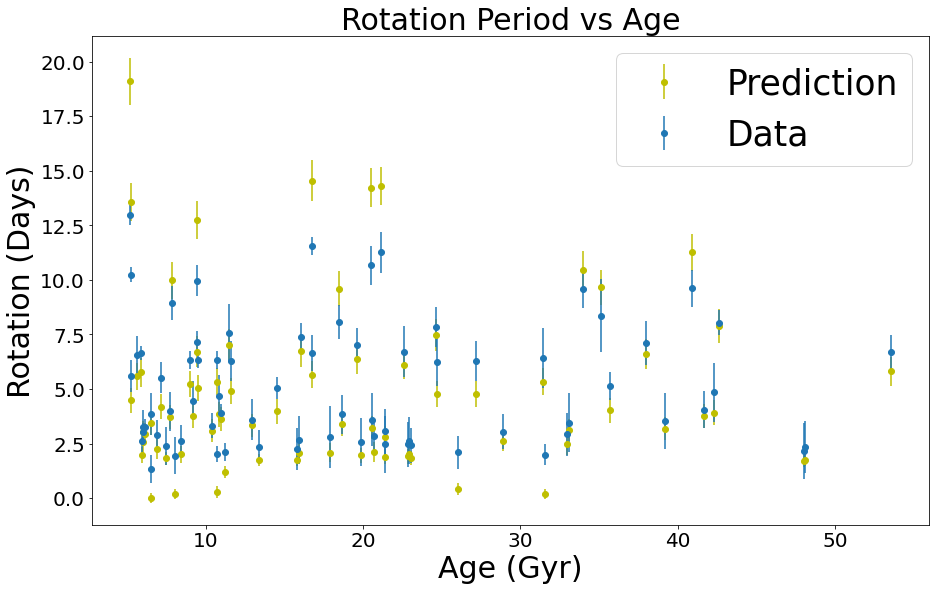

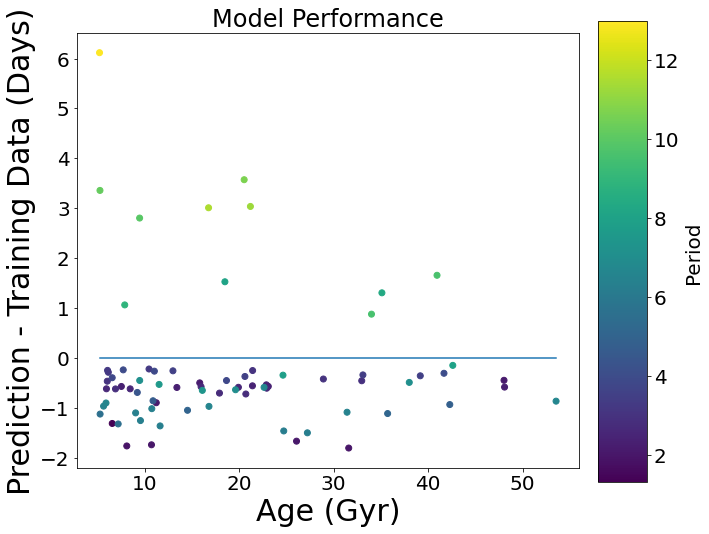

In [136]:
plt.figure(figsize=(15,9))
x = np.linspace(0, max(age))
zline = np.linspace(min(np.exp(X1)), max(np.exp(X1)))
font = {'size': 30,
        }
plt.title('Prediction vs Data', fontdict=font)
# #plt.errorbar(np.sort(data[::al, 1]), vals[0,:], yerr=vals[1,:]**0.5, fmt='bo')
plt.fill_between(np.sort(age), vals[0,:] - vals[1,:], vals[0,:] + vals[1,:], color='blue', alpha=0.2, label='1 STD')
plt.fill_between(np.sort(age), vals[0,:] - 2*vals[1,:], vals[0,:] + 2*vals[1,:], color='blue', alpha=0.1, label='2 STD')
plt.fill_between(np.sort(age), vals[0,:] - 3*vals[1,:], vals[0,:] + 3*vals[1,:], color='blue', alpha=0.05, label='3 STD')

#plt.errorbar(np.sort(p), np.sort(mu_test), yerr=vals[1,:], fmt='o')
plt.scatter(np.sort(age), np.sort(mu_test), label='Mean')
plt.plot(x, x , 'r', label='y=x line')
plt.xlabel('Data', fontdict=font)
plt.ylabel('Prediction', fontdict=font)
plt.legend(fontsize='x-large')
# plt.savefig("adam.pdf")
# files.download("adam.pdf") 

plt.figure(figsize=(15,9))
plt.title('Rotation Period vs Age', fontdict=font)
plt.errorbar(np.exp(X1), np.sort(vals[0]), yerr=vals[1], fmt='o', c='y', label='Prediction')
plt.errorbar(np.exp(X1), np.sort(age), yerr=noise_variance, fmt='o', label='Data')
plt.xlabel('Age (Gyr)', fontdict=font)
plt.ylabel('Rotation (Days)', fontdict=font)
plt.legend(fontsize='xx-large')
# plt.savefig("scatter_adam.pdf")
# files.download("scatter_adam.pdf") 

plt.figure(figsize=(9,8))
plt.plot(zline, np.zeros(zline.shape))
#plt.errorbar(X2, np.sort(vals[0]) - np.sort(p), yerr=2*vals[1], fmt='o', c='y', label='2 standard deviations', alpha=0.4)
#plt.errorbar(X2, np.sort(vals[0]) - np.sort(p), yerr=vals[1], fmt='o', c='y', label='Prediction')
plt.scatter(np.exp(X1), np.sort(vals[0]) - np.sort(age), c=np.sort(age), cmap='viridis')
plt.xlabel('Age (Gyr)', fontdict=font)
plt.ylabel('Prediction - Training Data (Days)', fontdict=font)
plt.title('Model Performance')
cax = plt.axes([0.93, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax, label='Period')
#plt.legend(fontsize='medium', loc=3)
# plt.savefig("residuals_adam.pdf", bbox_inches = 'tight')
# files.download("residuals_adam.pdf") 

In [137]:
import scipy
scipy.stats.ttest_ind(sample, age)

Ttest_indResult(statistic=array([-12.83773581, -11.34614159,  14.51824432,  -7.97368262,
        -2.54404148, -10.23447094,  22.71868287,  -6.01296882,
        -7.8990758 ,  26.35996729, -12.13842996,  -2.90995289,
        -4.6261599 ,   0.04946809,  -5.47591244, -12.34795921,
       -10.80982697,  -0.69621577,  -5.00663802,  -2.86335066,
        -3.49643313, -10.12025982,  -1.70148159,  -9.70810279,
         6.2898188 ,   5.76044591, -10.6735644 ,  -9.1732024 ,
        -7.27094666,   5.02199998,   8.30565022,  -5.71415724,
        -6.12469648,   1.62925627,  -9.22738494,  -7.05345852,
        -8.75248615,  17.65122452,  -9.15496144,  -7.24852761,
        22.02883606,  -3.97853879,  19.66981039,  -8.65215338,
        -9.97803418,  -4.18850735,   5.93093225,  -4.92641487,
        -7.04476643,  -7.75949872,  -7.26138883,   1.92174521,
       -10.70208409,  -4.32481258, -10.41458558,  47.02517467,
         1.74557436,  -4.08341913,  29.79666095,  -6.95980536,
        -1.92742881,  -6.5540

In [138]:
p_gp = np.exp(-0.5*(np.sort(age)-np.sort(vals[0]))**2)/np.sqrt(2*3.14)
p_gp_odds = 1
for i in p_gp[:75]:
  p_gp_odds = p_gp_odds*i

In [139]:
p_gp_odds

1.1331572470398406e-61

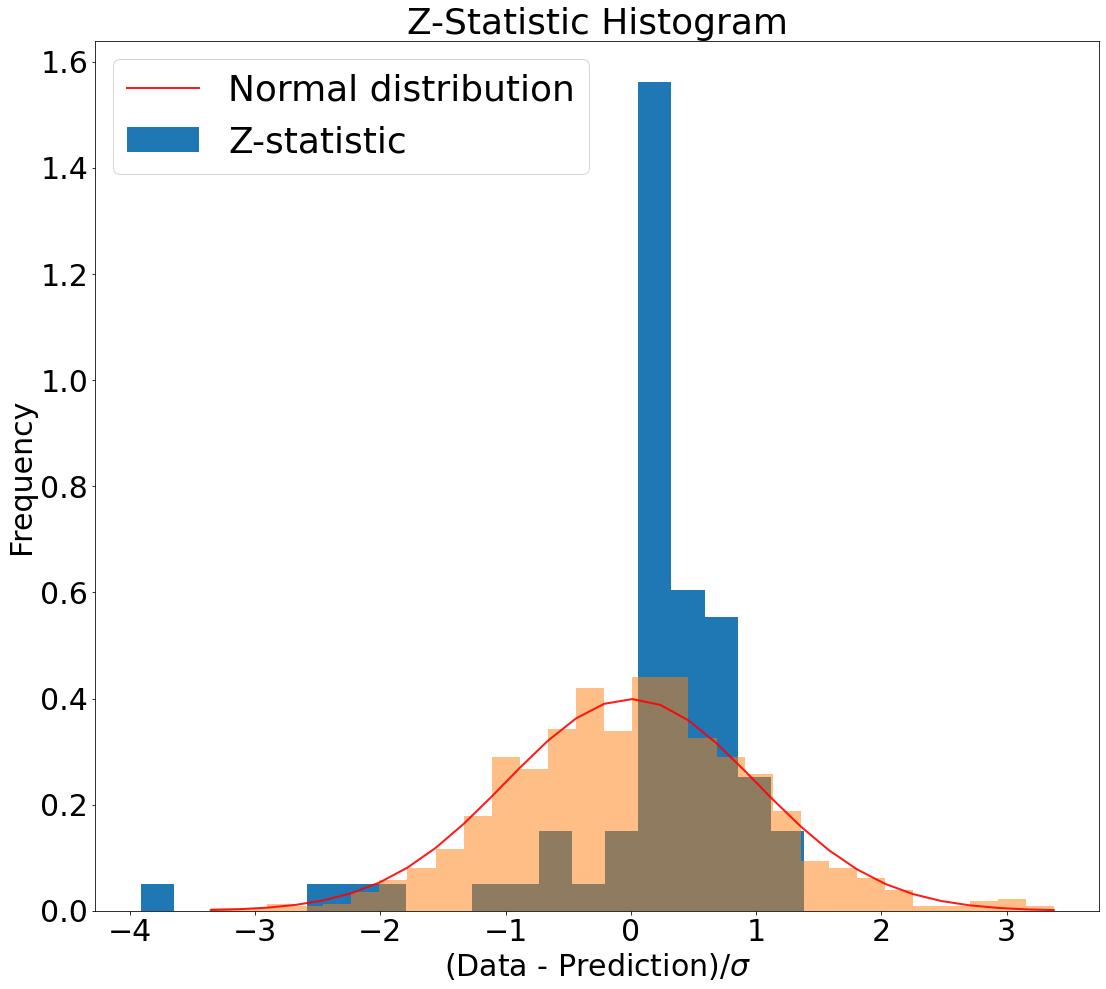

In [140]:
Z = (np.sort(age)-vals[0,:])/(vals[1,:]+p_error)**0.5
Z = Z[Z<6]
plt.rcParams['font.size'] = '30'
plt.figure(figsize=(18,16))
plt.hist(Z, density=True, bins=20, label='Z-statistic')
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, density=True, alpha=0.5)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r', alpha=0.9, label='Normal distribution')
plt.xlabel('(Data - Prediction)/$\sigma$')
plt.ylabel('Frequency')
plt.title('Z-Statistic Histogram')
plt.legend(fontsize='large')
# plt.savefig("z_stat_adam.pdf")
# files.download("z_stat_adam.pdf") 

(75,)


Text(0, 0.5, 'Frequency')

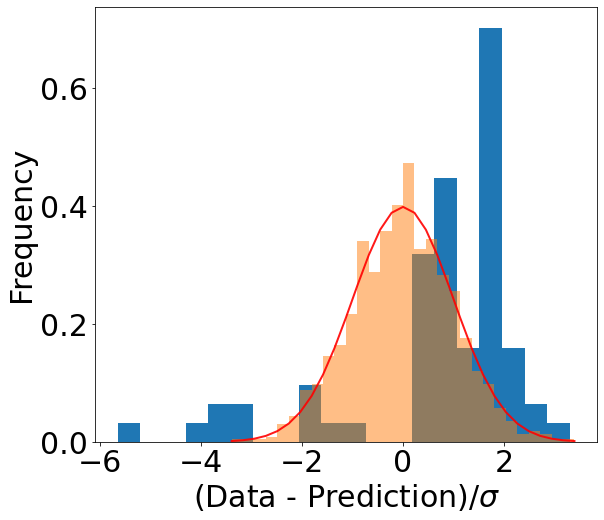

In [141]:
Z = (np.sort(age)-vals[0,:])/vals[1,:]
print(Y.shape)
Z = Z[Z<5]
plt.figure(figsize=(9,8))
plt.hist(Z, density=True, bins=20)
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, density=True, alpha=0.5)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r', alpha=0.9)
#plt.xlim((-5,5))
plt.xlabel('(Data - Prediction)/$\sigma$')
plt.ylabel('Frequency')

In [142]:
max(Z)

3.2978475801205835

In [143]:
import collections 
PooledModel = collections.namedtuple('PooledModel', ['Amplitude1','Length_Scale1', 'Obs'])
samplesN = [
      amplitudes[49],
      length_scales[49],
      observations1_[49]
]
pooled_samples = PooledModel._make(samplesN)

In [144]:
for var2, var_samples in pooled_samples._asdict().items():
  print('R-hat for ', var2, ':\t',
        tfp.mcmc.potential_scale_reduction(var_samples).numpy())

R-hat for  Amplitude1 :	 0.9866666666666666
R-hat for  Length_Scale1 :	 0.9866666666666666
R-hat for  Obs :	 4.541603968536812


In [145]:
import seaborn as sns
def plot_traces(var_name, samples, num_chains):
  if isinstance(samples, tf.Tensor):
    samples = samples.numpy() # convert to numpy array
  fig, axes = plt.subplots(1, 2, figsize=(14, 1.5), sharex='col', sharey='col')
  for chain in range(num_chains):
    axes[0].plot(samples[:, chain], alpha=0.7)
    axes[0].title.set_text("'{}' trace".format(var_name))
    sns.kdeplot(samples[:, chain], ax=axes[1], shade=False)
    axes[1].title.set_text("'{}' distribution".format(var_name))
    axes[0].set_xlabel('Iteration')
    axes[1].set_xlabel(var_name)
  plt.show()

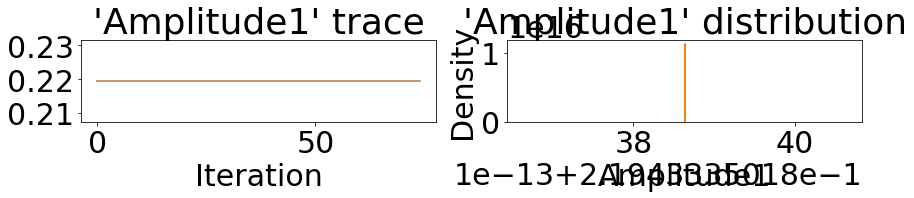

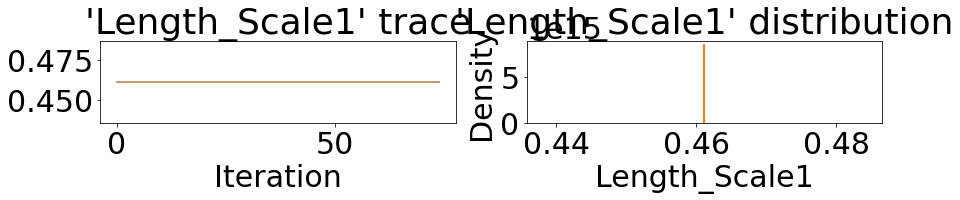

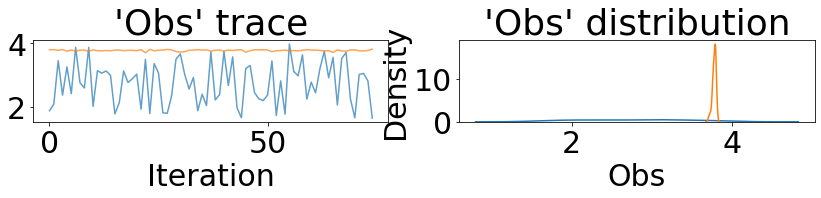

In [146]:
for var1, var_samples in pooled_samples._asdict().items():
  plot_traces(var1, samples=var_samples, num_chains=2)

(array([3., 0., 4., 5., 9., 6., 5., 6., 6., 3., 3., 1., 5., 5., 1., 4., 4.,
        1., 2., 2.]),
 array([-1.29615700e-15, -1.16015903e-15, -1.02416106e-15, -8.88163096e-16,
        -7.52165127e-16, -6.16167158e-16, -4.80169189e-16, -3.44171220e-16,
        -2.08173252e-16, -7.21752826e-17,  6.38226863e-17,  1.99820655e-16,
         3.35818624e-16,  4.71816593e-16,  6.07814562e-16,  7.43812531e-16,
         8.79810500e-16,  1.01580847e-15,  1.15180644e-15,  1.28780441e-15,
         1.42380238e-15]),
 <a list of 20 Patch objects>)

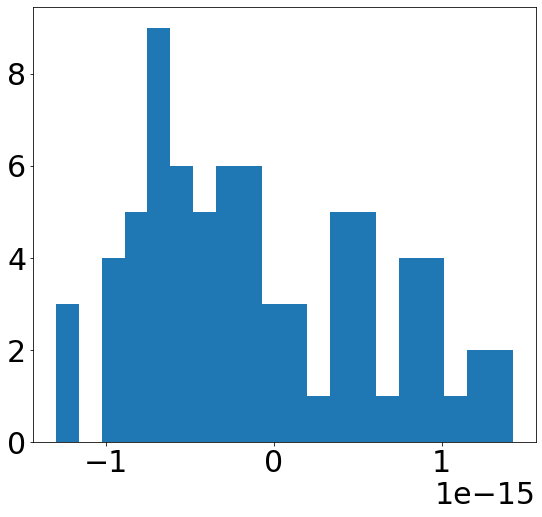

In [147]:
D = (observation_index_points_1[:,0]- observation_index_points[:,0])/observation_index_points[:,0]
plt.figure(figsize=(9,8))
plt.hist(D, bins=20)

(array([1.70256934, 2.97949635, 0.85128467, 1.70256934, 1.27692701,
        1.70256934, 2.97949635, 0.42564234, 0.85128467, 1.27692701,
        2.12821168, 1.70256934, 3.40513868, 1.27692701, 0.85128467,
        0.85128467, 2.55385401, 1.27692701, 0.85128467, 1.27692701]),
 array([-0.56843073, -0.53710552, -0.50578032, -0.47445511, -0.44312991,
        -0.4118047 , -0.3804795 , -0.34915429, -0.31782909, -0.28650389,
        -0.25517868, -0.22385348, -0.19252827, -0.16120307, -0.12987786,
        -0.09855266, -0.06722745, -0.03590225, -0.00457704,  0.02674816,
         0.05807337]),
 <a list of 20 Patch objects>)

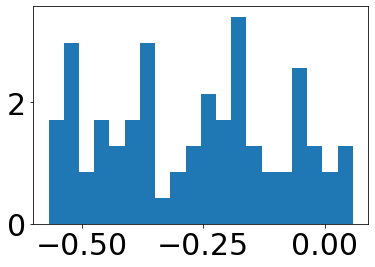

In [148]:
D_2 = (observation_index_points_1[:,0] - observation_index_points[:,1])/observation_index_points[:,1]
plt.hist(D_2, density=True, bins=20)